In [1]:
library("readxl")

In [2]:
hekdata <- read_excel("data/demodaydata.xlsx", sheet = "Summary data")

In [3]:
hekdata # just render a quick dump of the data to see what is looks like

series number,session,celltype,batch,marker,probs,missed,csize,csgt1,density,cscor1,csgt1cor1,ziqr,zviolin
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,April,HEK,0,X4,0.098,0.66,2.2,3.9,7.7,5.612245,9.948980,691,600
6,April,HEK,0,X4,0.118,0.61,2.8,4.4,19.0,5.932203,9.322034,588,500
10,April,HEK,0,X4,0.105,0.64,2.4,4.3,8.0,5.714286,10.238095,1000,800
7,April,HEK,A,X4,0.088,0.69,2.3,4.3,12.0,6.534091,12.215909,1173,800
1,August,HEK,1,X4,0.084,0.70,3.7,5.5,23.1,11.011905,16.369048,1105,800
2,August,HEK,1,X4,0.100,0.65,2.3,3.4,22.7,5.750000,8.500000,724,600
5,August,HEK,1,Q,0.100,0.66,2.5,4.0,11.1,6.250000,10.000000,996,700
6,August,HEK,1,Q,0.124,0.59,2.2,3.2,11.5,4.435484,6.451613,1006,600
5,December,HEK,4,X4,0.079,0.72,2.3,3.4,18.4,7.278481,10.759494,583,500


In [4]:
library(ggbeeswarm)
library(ggplot2)
theme_set(theme_light())

Lade nötiges Paket: ggplot2



In [5]:
summary(hekdata) # sum stats summary of the data, only for some inspection

 series number      session            celltype            batch          
 Min.   : 1.000   Length:13          Length:13          Length:13         
 1st Qu.: 5.000   Class :character   Class :character   Class :character  
 Median : 6.000   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 6.846                                                           
 3rd Qu.: 7.000                                                           
 Max.   :15.000                                                           
    marker              probs             missed           csize      
 Length:13          Min.   :0.06900   Min.   :0.5900   Min.   :2.200  
 Class :character   1st Qu.:0.08800   1st Qu.:0.6500   1st Qu.:2.300  
 Mode  :character   Median :0.10000   Median :0.6600   Median :2.400  
                    Mean   :0.09723   Mean   :0.6646   Mean   :2.685  
                    3rd Qu.:0.10200   3rd Qu.:0.6900   3rd Qu.:2.800  
                    Max.   :0.12400   Max.   :0.7

### Plotting boxplots in seperate panels

Below we generate a bunch of different boxplots from the sample data and assigns them to different variable names that hold these plots. Initially none of these plots appear.

Further below we then use the `patchwork` library to assemble the panels into a plot with the panels arranged as we like it.

In [6]:
plot_labeff <- ggplot(hekdata, aes(x=celltype,y=probs)) + 
  geom_quasirandom(width=0.15, alpha=0.4, size=5)  +
  geom_boxplot(fill=NA, outlier.color = NA, width=0.4) +
  labs(title = "Labelling Efficiency",
       y = bquote(p[label]), x = "Sample Type") +
  theme(text = element_text(size = 20)) +
  ylim(0.0,0.15)

In [7]:
plot_missed <- ggplot(hekdata, aes(x=celltype,y=missed)) + 
  geom_quasirandom(width=0.15, alpha=0.4, size=5)  +
  geom_boxplot(fill=NA, outlier.color = NA, width=0.4) +
  labs(title = "RyR Fraction missed",
       y = 'Fraction', x = "Sample Type") +
  theme(text = element_text(size = 20)) +
  ylim(0.0,0.8)

In [8]:
plotcs <- ggplot(hekdata, aes(x=celltype,y=csize)) + 
  geom_quasirandom(width=0.15, alpha=0.4, size=5)  +
  geom_boxplot(fill=NA, outlier.color = NA, width=0.4) +
  labs(title = "Cluster Size",
       y = '# corners', x = "Sample Type") +
  theme(text = element_text(size = 20)) +
  ylim(0.0,12)

In [9]:
plotcsgt1 <- ggplot(hekdata, aes(x=celltype,y=csgt1)) + 
  geom_quasirandom(width=0.15, alpha=0.4, size=5)  +
  geom_boxplot(fill=NA, outlier.color = NA, width=0.4) +
  labs(title = "Cluster Size (>1)",
       y = '# corners', x = "Sample Type") +
  theme(text = element_text(size = 20)) +
  ylim(0.0,12)

In [10]:
plotcsc <- ggplot(hekdata, aes(x=celltype,y=cscor1)) + 
  geom_quasirandom(width=0.15, alpha=0.4, size=5)  +
  geom_boxplot(fill=NA, outlier.color = NA, width=0.4) +
  labs(title = "Cluster Size",
       y = '# RyRs', x = "Sample Type") +
  theme(text = element_text(size = 20)) +
  ylim(0.0,30)

In [11]:
plotcsgt1c <- ggplot(hekdata, aes(x=celltype,y=csgt1cor1)) + 
  geom_quasirandom(width=0.15, alpha=0.4, size=5)  +
  geom_boxplot(fill=NA, outlier.color = NA, width=0.4) +
  labs(title = "Cluster Size (>1)",
       y = '# RyRs', x = "Sample Type") +
  theme(text = element_text(size = 20)) +
  ylim(0.0,30)

#### Now actually visualise the plots using the patchwork approach

Here we use the `patchwork` library to assemble the panels into a plot with the panels arranged as we like it. The use of the symbols `|` and `/` to arrange plots is explained in the `patchwork` docs which you can easily google.

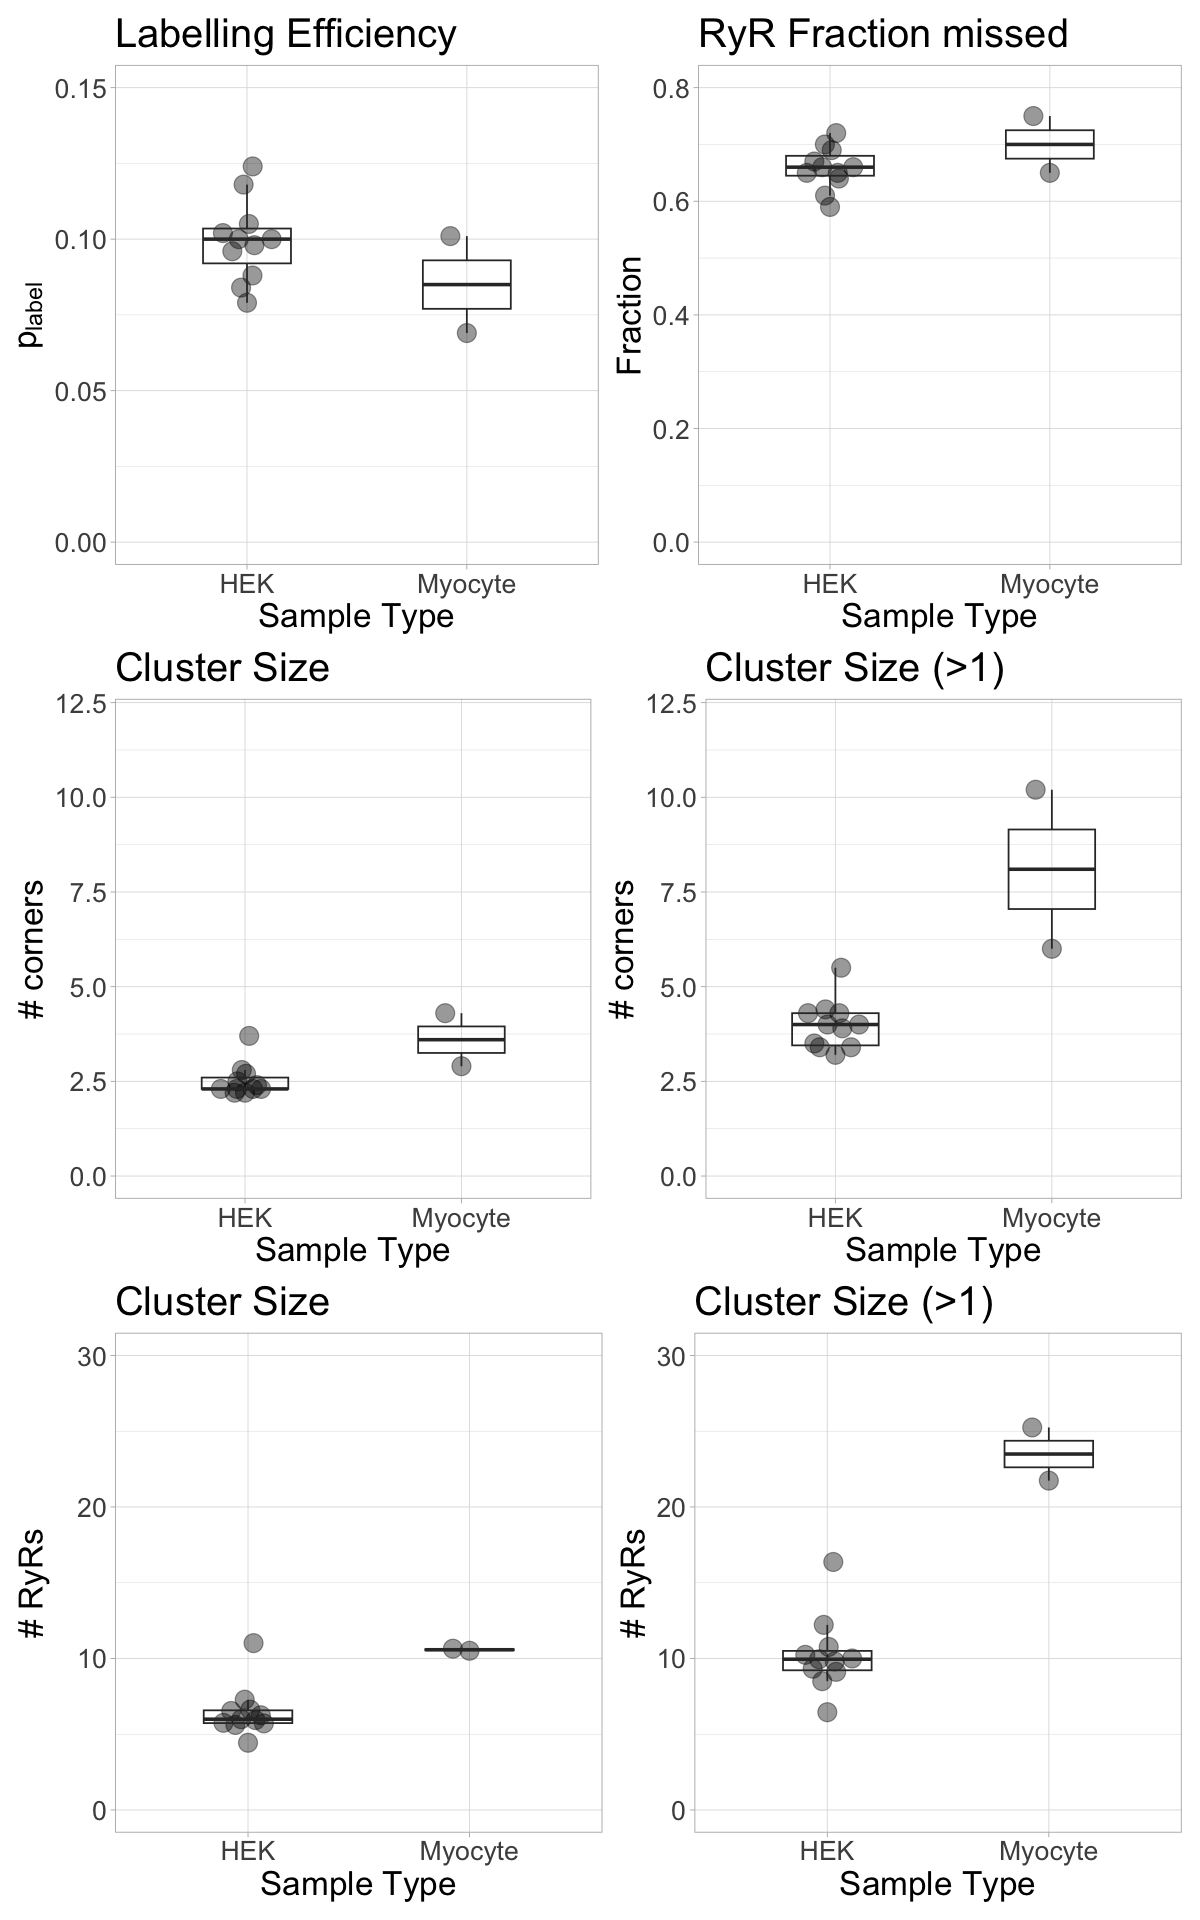

In [12]:
library(patchwork)
options(repr.plot.width = 10, repr.plot.height = 16)
(plot_labeff | plot_missed ) / (plotcs | plotcsgt1)  / (plotcsc | plotcsgt1c)

# ggsave('clusterstats.pdf',width = 10, height = 16) # uncomment to save the plot to PDF

### Boxplot with filled box but make the fill transparent

Key hear appears to be to add an ["aesthetic mapping"](https://ggplot2.tidyverse.org/reference/aes.html), i.e. `aes(...)` to the `geom_boxplot` function with a `fill=celltype` argument. This tells ggplot to colour the boxplot by celltype. We add also `alpha=0.7` to make the colouring a little transparent so that we can see the datapoints under the box.

Note that compared to the plots above we have removed the `fill=NA` option from the `geom_boxplot` call which normally would create empty (non-filled/non-coloured) boxplots.

Note that a legend seems to be added by default. Not sure how to control this, e.g. how would I switch off the legend if I do not want it?

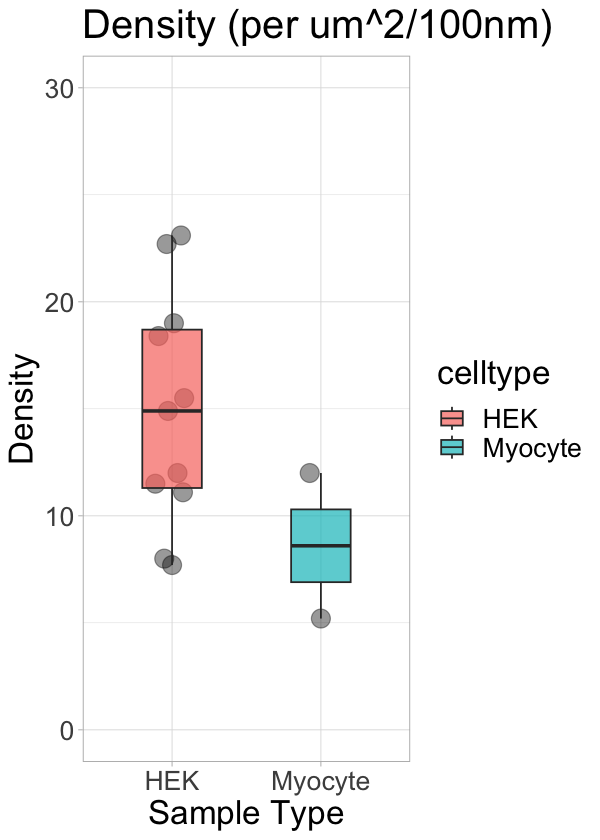

In [21]:
options(repr.plot.width = 5, repr.plot.height = 7)
ggplot(hekdata, aes(x=celltype,y=density)) + 
  geom_quasirandom(width=0.15, alpha=0.4, size=5)  +
  geom_boxplot(outlier.color = NA, width=0.4, aes(fill=celltype),alpha=0.7) + # fill boxplot (coloured) transparently (alpha=0.7)
  labs(title = "Density (per um^2/100nm)",
       y = 'Density', x = "Sample Type") +
  theme(text = element_text(size = 20)) +
  ylim(0.0,30)
# ggsave('cornerdensity.pdf',width = 5, height = 7) # uncomment to save the plot to PDF

In [14]:
plotziqr <- ggplot(hekdata, aes(x=celltype,y=ziqr)) + 
  geom_quasirandom(width=0.15, alpha=0.4, size=5)  +
  geom_boxplot(fill=NA, outlier.color = NA, width=0.4) +
  labs(title = "Z extent (from IQR)",
       y = 'z extent (nm)', x = "Sample Type") +
  theme(text = element_text(size = 20)) +
  ylim(0.0,1500)

In [15]:
plotzviolin <- ggplot(hekdata, aes(x=celltype,y=zviolin)) + 
  geom_quasirandom(width=0.15, alpha=0.4, size=5)  +
  geom_boxplot(fill=NA, outlier.color = NA, width=0.4) +
  labs(title = "Z extent (histo)",
       y = 'z extent (nm)', x = "Sample Type") +
  theme(text = element_text(size = 20)) +
  ylim(0.0,1500)

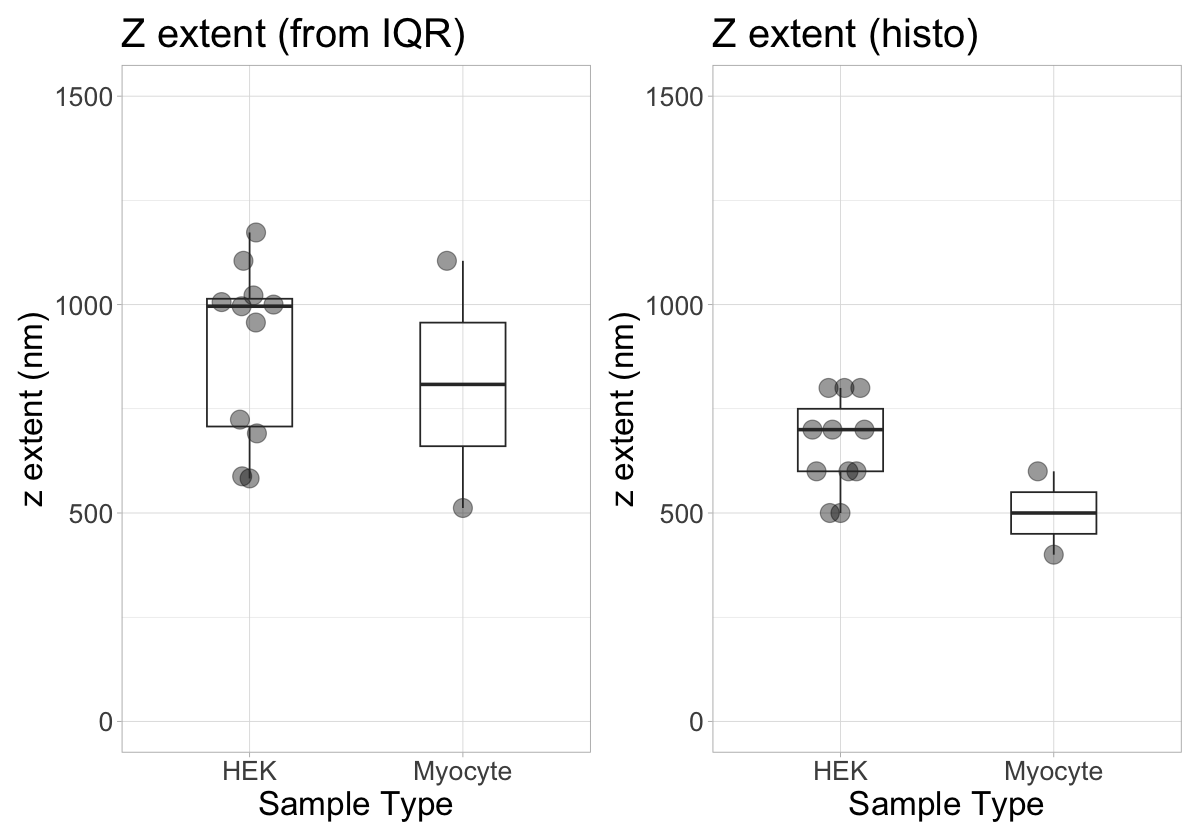

In [16]:
options(repr.plot.width = 10, repr.plot.height = 7)
(plotziqr | plotzviolin )
# ggsave('zextent.pdf',width = 10, height = 7)  # uncomment to save the plot to PDF

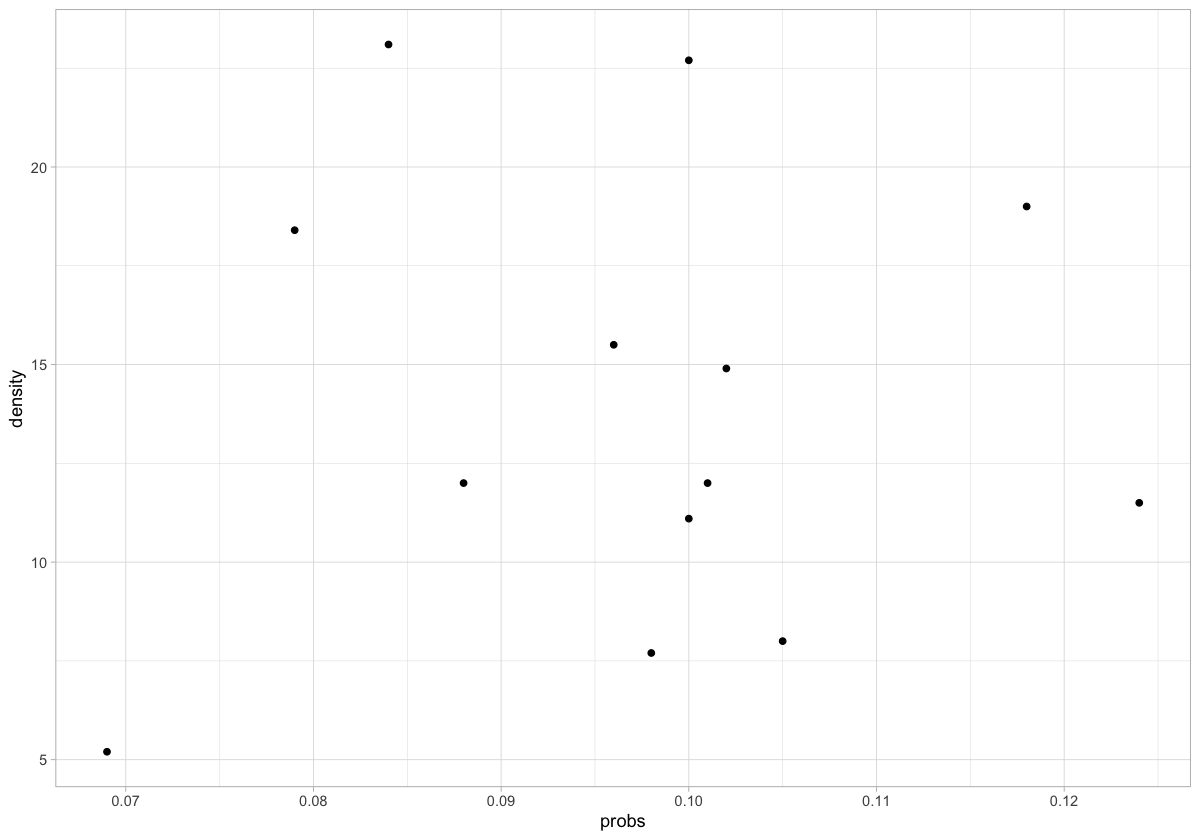

In [17]:
# basic scatterplot
ggplot(hekdata, aes(x=probs, y=density)) + 
    geom_point()